In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generated array of points :


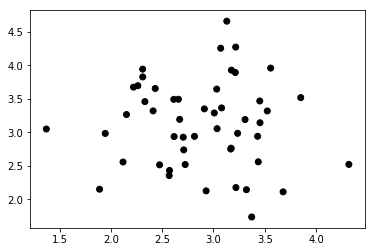

In [2]:
points = []

num_points = 50
num_clusters = 2 #binary

points_start_center = [3., 3.]
std = 0.6


for i in range(num_points):
    x_i = np.random.normal(loc=points_start_center[0], scale=std)
    y_i = np.random.normal(loc=points_start_center[1], scale=std)
    points.append([x_i, y_i, -1])


null_color = 'k'
colors_types = ['r', 'g', 'b', 'y', 'm', 'k']
start_null_colors = [null_color] * num_points
    
points_x = list(map(lambda x: x[0], points))
points_y = list(map(lambda x: x[1], points))   
print('Generated array of points :')
plt.scatter(x=points_x, y=points_y, c=start_null_colors)

In [3]:
def clean_points(points) :
    for i in range(num_points):
        points[i][2] = -1
        
    return points


from random import randrange
    
def input_points(points, defined_points_count) :
    print('Input {} defined points'.format(defined_points_count))
    for i in range(defined_points_count) :
        points[i][2] = randrange(num_clusters)
    return points


def output_points(points, message):
    print('\n{}'.format(message))
    #points_x = list(map(lambda x: x[0], points))
    #points_y = list(map(lambda x: x[1], points))
    colors_numbers = list(map(lambda x: x[2], points))
    colors = [colors_types[colors_numbers[points[n][2]]] for n in range(num_points)]
    plt.scatter(x=points_x, y=points_y, c=colors)
    plt.show()

In [4]:
from math import pow, sqrt
    
def get_distance(point1, point2):
    x1 = point1[0]
    y1 = point1[1]
    x2 = point2[0]
    y2 = point2[1]
    dx = x1 - x2
    dy = y1 - y2
    distance = sqrt(pow(dx, 2) + pow(dy, 2))
    return distance

def get_sorted_distances(points, i, this_point) :
    distances = []
    for points_number in range(num_points) :
        if points_number != i :
            if points[points_number][2] != -1 :
                distance = get_distance(this_point, points[points_number])
                cluster = points[points_number][2]
                distances.append([distance, cluster, points_number])

    distances.sort()
    return distances

In [5]:
def KNN(points, knn) :
    print('KNN start')
    output_points(points, 'Input data :')   
    iteration = 0
    for i in range(num_points) :
        this_point = points[i]
        if this_point[2] == -1 :
            iteration += 1
            this_distances = get_sorted_distances(points, i, this_point)
            possible_clusters = [0 for x in range(num_clusters)]
            cluster_defined = False
            j = 0

            while not cluster_defined :
                npc = this_distances[j][1] # number of possible cluster
                possible_clusters[npc] += 1
                if possible_clusters[npc] == knn :
                    this_point[2] = npc
                    cluster_defined = True
                    
            output_points(points, 'iteration #{}; Point number {} :'.format(iteration, i))
            
    output_points(points, 'Finished :')

In [6]:
def KNqfN(points, knn) :
    print('KNN start')
    output_points(points, 'Input data :')    
    points = determine_points_belonging_to_clusters(points)
    output_points(points, 'Finished :')

Input 20 defined points
KNN start

Input data :


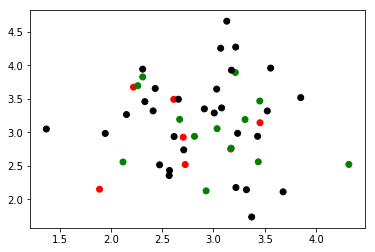


iteration #1; Point number 20 :


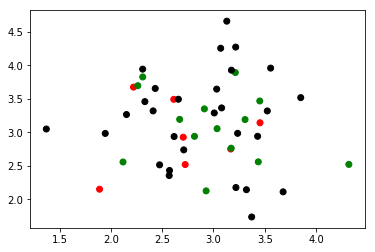


iteration #2; Point number 21 :


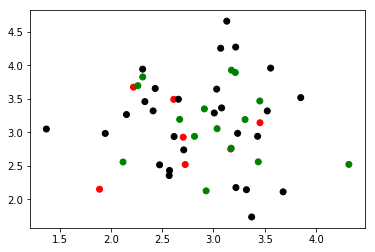


iteration #3; Point number 22 :


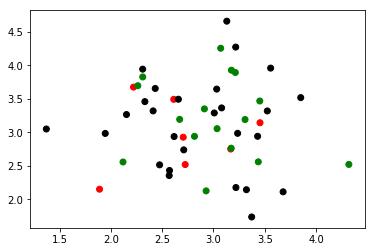


iteration #4; Point number 23 :


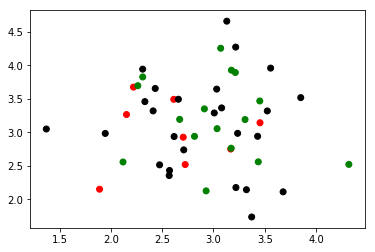


iteration #5; Point number 24 :


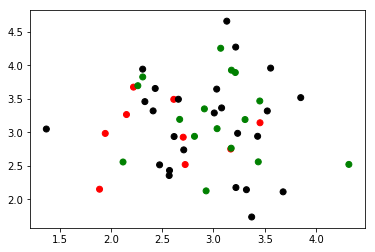


iteration #6; Point number 25 :


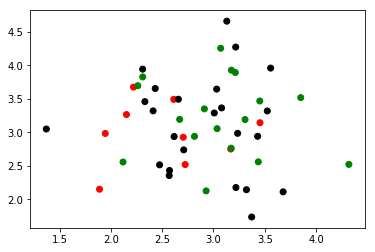


iteration #7; Point number 26 :


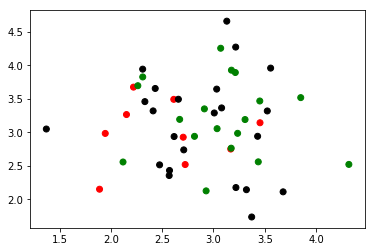


iteration #8; Point number 27 :


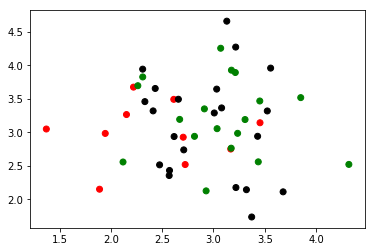


iteration #9; Point number 28 :


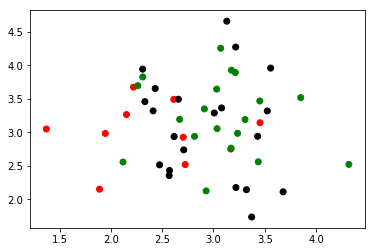


iteration #10; Point number 29 :


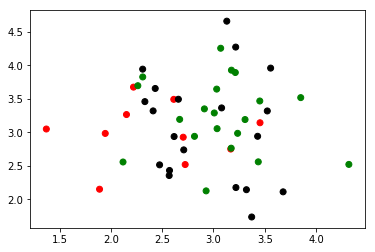


iteration #11; Point number 30 :


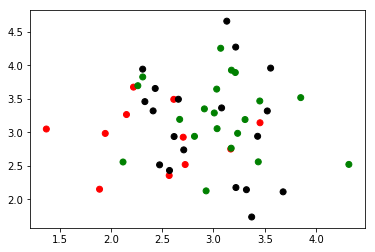


iteration #12; Point number 31 :


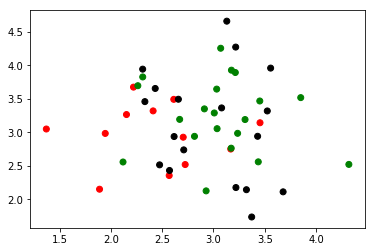


iteration #13; Point number 32 :


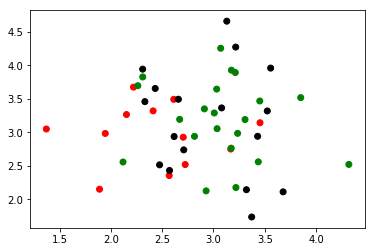


iteration #14; Point number 33 :


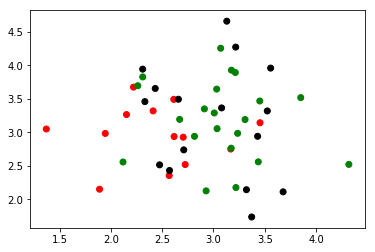


iteration #15; Point number 34 :


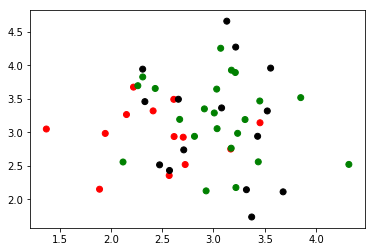


iteration #16; Point number 35 :


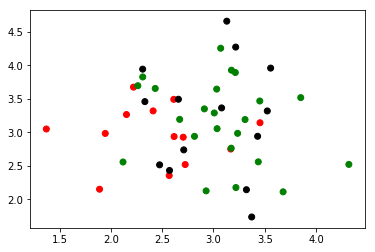


iteration #17; Point number 36 :


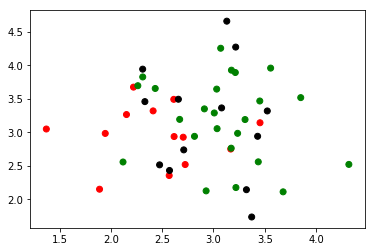


iteration #18; Point number 37 :


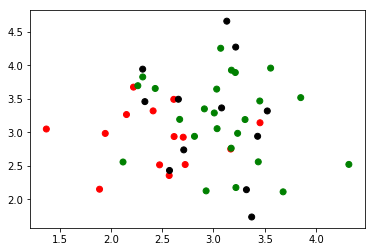


iteration #19; Point number 38 :


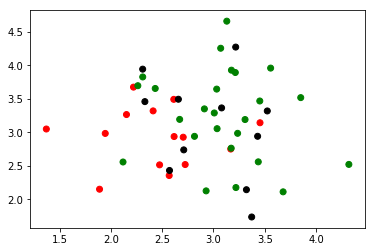


iteration #20; Point number 39 :


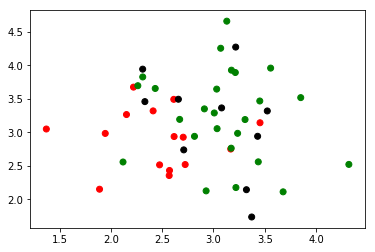


iteration #21; Point number 40 :


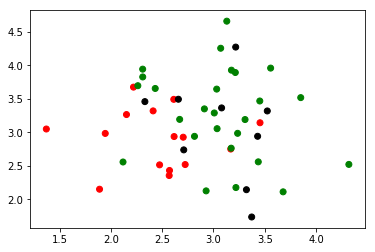


iteration #22; Point number 41 :


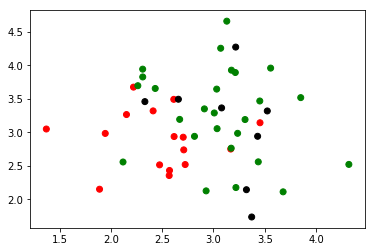


iteration #23; Point number 42 :


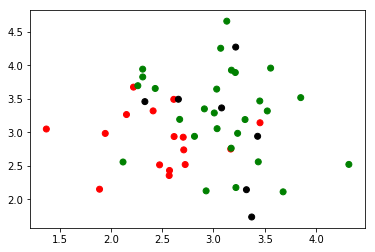


iteration #24; Point number 43 :


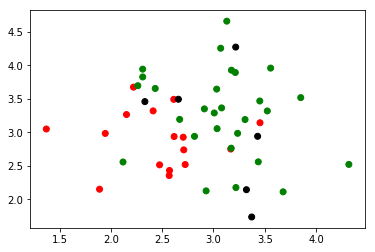


iteration #25; Point number 44 :


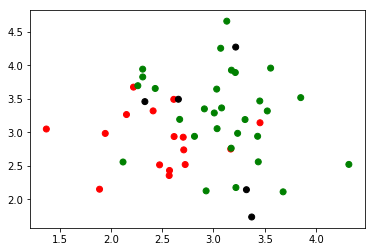


iteration #26; Point number 45 :


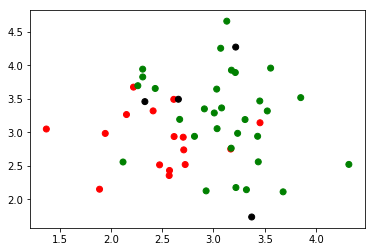


iteration #27; Point number 46 :


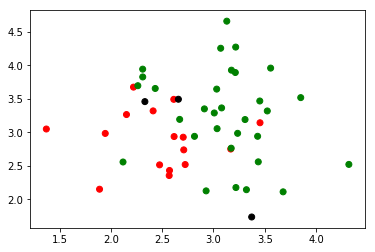


iteration #28; Point number 47 :


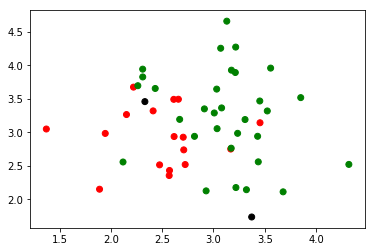


iteration #29; Point number 48 :


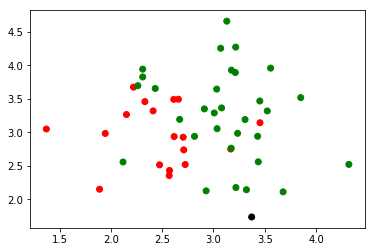


iteration #30; Point number 49 :


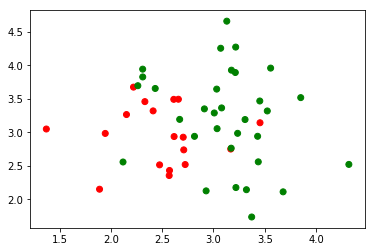


Finished :


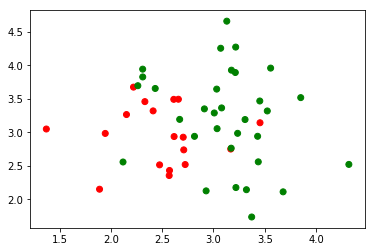

In [8]:
points = clean_points(points)
points = input_points(points, 20)
KNN(points, 3)